# Test de blancura
La prueba de Box-Pierce-Ljung considera como Hipótesis nula (H0) los
residuos son no correlacionados contra la hipótesis alternativa (H1) los residuos tienen correlación. El estadístico de prueba Q depende de la función de autocorrelación y tiene una distribución asintótica chi-cuadrado.

# Recordar instalar librería

In [ ]:
!pip install darts


# Cargar librerías

In [3]:
import numpy as np
from darts import TimeSeries
from darts.datasets import AirPassengersDataset
from darts.models import ExponentialSmoothing
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt



<Axes: xlabel='Month'>

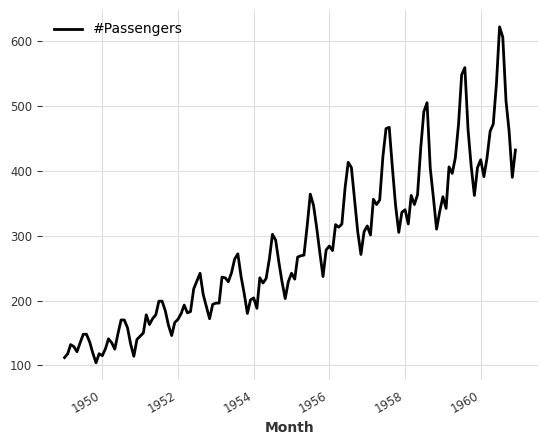

In [4]:
series = AirPassengersDataset().load()
series.plot()


#Aplicar modelo de suavizamiento exponencial
El objetivo es verificar si los residuos son un ruido blanco

<Axes: xlabel='Month'>

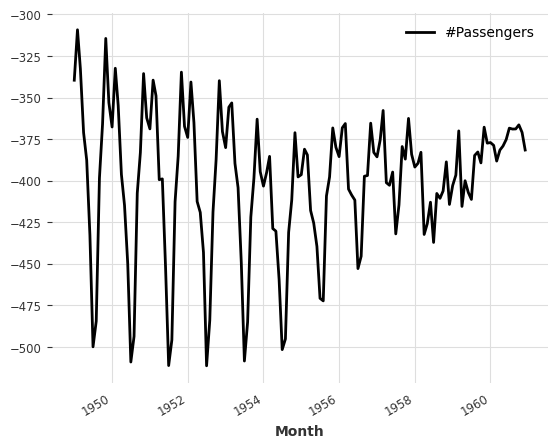

In [5]:
model = ExponentialSmoothing()
model.fit(series)
forecast = model.predict(len(series))
residuals = series - forecast
residuals.plot()


# Test de Box-Pierce-Ljung

In [6]:
ljungbox_results = acorr_ljungbox(residuals.values(), lags=10, return_df=True)
print(ljungbox_results)


       lb_stat     lb_pvalue
1    74.993733  4.722106e-18
2    89.870546  3.053929e-20
3    89.927574  2.270457e-19
4   105.034514  8.327964e-22
5   137.820771  5.197677e-28
6   169.369072  6.120788e-34
7   197.006771  4.938830e-39
8   207.130332  2.006087e-40
9   207.187399  1.029505e-39
10  219.764667  1.197186e-41


# Resultados para un ruido blanco

<Axes: xlabel='time'>

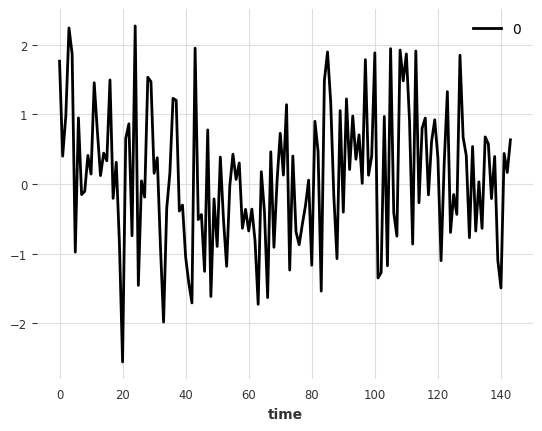

In [7]:
white_noise = TimeSeries.from_values(np.random.randn(144))
white_noise.plot()


In [8]:
ljungbox_white_noise = acorr_ljungbox(white_noise.values(), lags=10, return_df=True)
print(ljungbox_white_noise)


      lb_stat  lb_pvalue
1    0.091346   0.762472
2    1.325577   0.515412
3    1.996749   0.573082
4    2.655215   0.617074
5    4.344172   0.500999
6    4.709203   0.581613
7    5.890026   0.552648
8   12.227924   0.141321
9   13.387425   0.145845
10  15.489000   0.115225
